In [1]:
from pdf2image import convert_from_path

import fitz
print(fitz.__doc__)


PyMuPDF 1.19.2: Python bindings for the MuPDF 1.19.0 library.
Version date: 2021-11-20 00:00:01.
Built for Python 3.8 on win32 (64-bit).



In [5]:
from PIL import Image, ImageTk
# set the mode depending on alpha
mode = "RGBA" if pix.alpha else "RGB"
filename = 'test_files/15635_whw04_1325814_15.pdf'

In [7]:
%%timeit
doc = fitz.open(filename)
page = doc.load_page(0)
pix = page.get_pixmap()
img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)
img

25.8 ms ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit
img2 = convert_from_path(filename)[0]
img2

1.56 s ± 4.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
def pdf2img(fname,pno = 0):
    doc = fitz.open(fname)
    page = doc.load_page(pno)
    pix = page.get_pixmap()
    mode = "RGBA" if pix.alpha else "RGB"
    return Image.frombytes(mode, [pix.width, pix.height], pix.samples)

Wall time: 23 ms


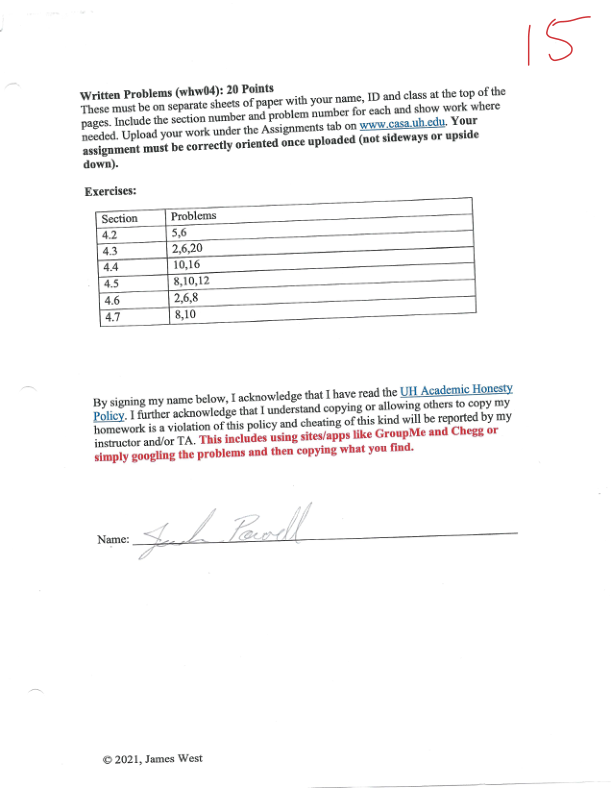

In [12]:
%%time
pdf2img(filename)